## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9606716	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.6ms	remaining: 9.17s
7:	learn: 0.8558633	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8400199	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8229065	total: 67.3ms	remaining: 6.67s
10:	learn: 0.8057776	total: 68.2ms	remaining: 6.13s
11:	learn: 0.7907426	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7753485	total: 69.9ms	remaining: 5.31s
13:	learn: 0.7601130	total: 70.7ms	remaining: 4.98s
14:	learn: 0.7475256	total: 71.5ms	remaining: 4.7s
15:	learn: 0.7326054	total: 72.3ms	remaining: 4.45s
16:	learn: 0.7206853	total: 73ms	remaining: 4.22s
17:	learn: 0.7077303	total: 73.8ms	remaining: 4.03s
18:	learn: 0.6955287	total: 74.6ms	remaining: 3

107:	learn: 0.2965967	total: 150ms	remaining: 1.24s
108:	learn: 0.2951864	total: 151ms	remaining: 1.23s
109:	learn: 0.2942861	total: 152ms	remaining: 1.23s
110:	learn: 0.2932928	total: 153ms	remaining: 1.22s
111:	learn: 0.2916150	total: 153ms	remaining: 1.22s
112:	learn: 0.2903158	total: 154ms	remaining: 1.21s
113:	learn: 0.2893044	total: 155ms	remaining: 1.21s
114:	learn: 0.2880453	total: 156ms	remaining: 1.2s
115:	learn: 0.2868924	total: 157ms	remaining: 1.2s
116:	learn: 0.2854905	total: 158ms	remaining: 1.19s
117:	learn: 0.2838426	total: 159ms	remaining: 1.19s
118:	learn: 0.2827228	total: 160ms	remaining: 1.18s
119:	learn: 0.2820207	total: 161ms	remaining: 1.18s
120:	learn: 0.2807575	total: 162ms	remaining: 1.17s
121:	learn: 0.2800950	total: 162ms	remaining: 1.17s
122:	learn: 0.2793606	total: 163ms	remaining: 1.17s
123:	learn: 0.2786503	total: 164ms	remaining: 1.16s
124:	learn: 0.2775226	total: 165ms	remaining: 1.16s
125:	learn: 0.2762040	total: 166ms	remaining: 1.15s
126:	learn: 0.

154:	learn: 0.2497802	total: 192ms	remaining: 1.05s
155:	learn: 0.2490613	total: 193ms	remaining: 1.04s
156:	learn: 0.2484356	total: 194ms	remaining: 1.04s
157:	learn: 0.2475208	total: 195ms	remaining: 1.04s
158:	learn: 0.2467460	total: 196ms	remaining: 1.04s
159:	learn: 0.2461317	total: 197ms	remaining: 1.03s
160:	learn: 0.2456028	total: 198ms	remaining: 1.03s
161:	learn: 0.2449256	total: 199ms	remaining: 1.03s
162:	learn: 0.2444113	total: 200ms	remaining: 1.03s
163:	learn: 0.2438126	total: 201ms	remaining: 1.02s
164:	learn: 0.2432080	total: 202ms	remaining: 1.02s
165:	learn: 0.2425986	total: 203ms	remaining: 1.02s
166:	learn: 0.2421108	total: 204ms	remaining: 1.02s
167:	learn: 0.2413956	total: 205ms	remaining: 1.01s
168:	learn: 0.2407630	total: 206ms	remaining: 1.01s
169:	learn: 0.2401529	total: 207ms	remaining: 1.01s
170:	learn: 0.2391465	total: 208ms	remaining: 1.01s
171:	learn: 0.2383087	total: 209ms	remaining: 1s
172:	learn: 0.2377594	total: 210ms	remaining: 1s
173:	learn: 0.2373

322:	learn: 0.1696955	total: 341ms	remaining: 714ms
323:	learn: 0.1695203	total: 342ms	remaining: 713ms
324:	learn: 0.1693707	total: 343ms	remaining: 712ms
325:	learn: 0.1690932	total: 344ms	remaining: 711ms
326:	learn: 0.1687871	total: 345ms	remaining: 710ms
327:	learn: 0.1684932	total: 346ms	remaining: 709ms
328:	learn: 0.1680740	total: 347ms	remaining: 707ms
329:	learn: 0.1676495	total: 348ms	remaining: 706ms
330:	learn: 0.1672606	total: 348ms	remaining: 704ms
331:	learn: 0.1669891	total: 349ms	remaining: 703ms
332:	learn: 0.1666284	total: 350ms	remaining: 702ms
333:	learn: 0.1664670	total: 351ms	remaining: 700ms
334:	learn: 0.1660441	total: 352ms	remaining: 698ms
335:	learn: 0.1657088	total: 353ms	remaining: 698ms
336:	learn: 0.1653987	total: 354ms	remaining: 696ms
337:	learn: 0.1652355	total: 355ms	remaining: 695ms
338:	learn: 0.1648615	total: 355ms	remaining: 693ms
339:	learn: 0.1646361	total: 356ms	remaining: 692ms
340:	learn: 0.1643424	total: 357ms	remaining: 690ms
341:	learn: 

369:	learn: 0.1568606	total: 383ms	remaining: 653ms
370:	learn: 0.1564609	total: 384ms	remaining: 651ms
371:	learn: 0.1560608	total: 385ms	remaining: 650ms
372:	learn: 0.1558547	total: 386ms	remaining: 649ms
373:	learn: 0.1555605	total: 387ms	remaining: 647ms
374:	learn: 0.1552292	total: 388ms	remaining: 646ms
375:	learn: 0.1549435	total: 388ms	remaining: 645ms
376:	learn: 0.1546544	total: 389ms	remaining: 643ms
377:	learn: 0.1543066	total: 390ms	remaining: 642ms
378:	learn: 0.1540311	total: 391ms	remaining: 641ms
379:	learn: 0.1536233	total: 392ms	remaining: 639ms
380:	learn: 0.1533239	total: 393ms	remaining: 638ms
381:	learn: 0.1530299	total: 393ms	remaining: 636ms
382:	learn: 0.1528336	total: 394ms	remaining: 635ms
383:	learn: 0.1526162	total: 395ms	remaining: 634ms
384:	learn: 0.1523426	total: 396ms	remaining: 633ms
385:	learn: 0.1521042	total: 397ms	remaining: 631ms
386:	learn: 0.1518990	total: 398ms	remaining: 630ms
387:	learn: 0.1516118	total: 399ms	remaining: 629ms
388:	learn: 

523:	learn: 0.1241885	total: 515ms	remaining: 468ms
524:	learn: 0.1240465	total: 516ms	remaining: 467ms
525:	learn: 0.1238986	total: 517ms	remaining: 466ms
526:	learn: 0.1237245	total: 518ms	remaining: 465ms
527:	learn: 0.1236307	total: 519ms	remaining: 464ms
528:	learn: 0.1233258	total: 520ms	remaining: 463ms
529:	learn: 0.1232458	total: 521ms	remaining: 462ms
530:	learn: 0.1230684	total: 522ms	remaining: 461ms
531:	learn: 0.1229753	total: 523ms	remaining: 460ms
532:	learn: 0.1229118	total: 523ms	remaining: 459ms
533:	learn: 0.1227483	total: 524ms	remaining: 458ms
534:	learn: 0.1227345	total: 525ms	remaining: 456ms
535:	learn: 0.1226136	total: 526ms	remaining: 455ms
536:	learn: 0.1225049	total: 527ms	remaining: 454ms
537:	learn: 0.1223317	total: 528ms	remaining: 453ms
538:	learn: 0.1221160	total: 529ms	remaining: 452ms
539:	learn: 0.1219316	total: 530ms	remaining: 451ms
540:	learn: 0.1217415	total: 530ms	remaining: 450ms
541:	learn: 0.1214753	total: 532ms	remaining: 449ms
542:	learn: 

571:	learn: 0.1161027	total: 558ms	remaining: 417ms
572:	learn: 0.1159918	total: 559ms	remaining: 416ms
573:	learn: 0.1157478	total: 560ms	remaining: 415ms
574:	learn: 0.1155859	total: 560ms	remaining: 414ms
575:	learn: 0.1154385	total: 561ms	remaining: 413ms
576:	learn: 0.1153858	total: 562ms	remaining: 412ms
577:	learn: 0.1153157	total: 563ms	remaining: 411ms
578:	learn: 0.1150992	total: 564ms	remaining: 410ms
579:	learn: 0.1147799	total: 565ms	remaining: 409ms
580:	learn: 0.1146177	total: 566ms	remaining: 408ms
581:	learn: 0.1144786	total: 567ms	remaining: 407ms
582:	learn: 0.1143718	total: 568ms	remaining: 406ms
583:	learn: 0.1142120	total: 569ms	remaining: 405ms
584:	learn: 0.1139755	total: 569ms	remaining: 404ms
585:	learn: 0.1137566	total: 570ms	remaining: 403ms
586:	learn: 0.1135706	total: 571ms	remaining: 402ms
587:	learn: 0.1134748	total: 572ms	remaining: 401ms
588:	learn: 0.1134371	total: 572ms	remaining: 399ms
589:	learn: 0.1131994	total: 573ms	remaining: 398ms
590:	learn: 

735:	learn: 0.0930800	total: 706ms	remaining: 253ms
736:	learn: 0.0929764	total: 708ms	remaining: 253ms
737:	learn: 0.0928240	total: 709ms	remaining: 252ms
738:	learn: 0.0927183	total: 709ms	remaining: 251ms
739:	learn: 0.0925957	total: 710ms	remaining: 250ms
740:	learn: 0.0925025	total: 711ms	remaining: 249ms
741:	learn: 0.0923401	total: 712ms	remaining: 248ms
742:	learn: 0.0923163	total: 713ms	remaining: 247ms
743:	learn: 0.0921469	total: 714ms	remaining: 246ms
744:	learn: 0.0920264	total: 715ms	remaining: 245ms
745:	learn: 0.0918709	total: 726ms	remaining: 247ms
746:	learn: 0.0917286	total: 727ms	remaining: 246ms
747:	learn: 0.0916813	total: 729ms	remaining: 246ms
748:	learn: 0.0915730	total: 730ms	remaining: 245ms
749:	learn: 0.0915436	total: 731ms	remaining: 244ms
750:	learn: 0.0914450	total: 732ms	remaining: 243ms
751:	learn: 0.0912826	total: 734ms	remaining: 242ms
752:	learn: 0.0911103	total: 735ms	remaining: 241ms
753:	learn: 0.0909450	total: 736ms	remaining: 240ms
754:	learn: 

765:	learn: 0.0897384	total: 749ms	remaining: 229ms
766:	learn: 0.0896966	total: 751ms	remaining: 228ms
767:	learn: 0.0895544	total: 752ms	remaining: 227ms
768:	learn: 0.0893441	total: 753ms	remaining: 226ms
769:	learn: 0.0891873	total: 754ms	remaining: 225ms
770:	learn: 0.0890086	total: 756ms	remaining: 224ms
771:	learn: 0.0888501	total: 757ms	remaining: 223ms
772:	learn: 0.0886622	total: 758ms	remaining: 222ms
773:	learn: 0.0885537	total: 758ms	remaining: 221ms
774:	learn: 0.0884440	total: 759ms	remaining: 220ms
775:	learn: 0.0883600	total: 760ms	remaining: 219ms
776:	learn: 0.0882487	total: 761ms	remaining: 218ms
777:	learn: 0.0881022	total: 762ms	remaining: 217ms
778:	learn: 0.0879793	total: 763ms	remaining: 216ms
779:	learn: 0.0879265	total: 764ms	remaining: 215ms
780:	learn: 0.0877857	total: 765ms	remaining: 214ms
781:	learn: 0.0877384	total: 765ms	remaining: 213ms
782:	learn: 0.0876342	total: 766ms	remaining: 212ms
783:	learn: 0.0874749	total: 767ms	remaining: 211ms
784:	learn: 

935:	learn: 0.0735927	total: 898ms	remaining: 61.4ms
936:	learn: 0.0734929	total: 899ms	remaining: 60.4ms
937:	learn: 0.0733790	total: 900ms	remaining: 59.5ms
938:	learn: 0.0733648	total: 901ms	remaining: 58.5ms
939:	learn: 0.0732843	total: 901ms	remaining: 57.5ms
940:	learn: 0.0732315	total: 902ms	remaining: 56.6ms
941:	learn: 0.0731403	total: 903ms	remaining: 55.6ms
942:	learn: 0.0730199	total: 904ms	remaining: 54.6ms
943:	learn: 0.0729180	total: 905ms	remaining: 53.7ms
944:	learn: 0.0728465	total: 906ms	remaining: 52.7ms
945:	learn: 0.0728162	total: 907ms	remaining: 51.8ms
946:	learn: 0.0726765	total: 908ms	remaining: 50.8ms
947:	learn: 0.0726307	total: 908ms	remaining: 49.8ms
948:	learn: 0.0725315	total: 909ms	remaining: 48.9ms
949:	learn: 0.0724728	total: 910ms	remaining: 47.9ms
950:	learn: 0.0723660	total: 911ms	remaining: 46.9ms
951:	learn: 0.0722875	total: 912ms	remaining: 46ms
952:	learn: 0.0721778	total: 913ms	remaining: 45ms
953:	learn: 0.0721051	total: 914ms	remaining: 44.1

983:	learn: 0.0699035	total: 940ms	remaining: 15.3ms
984:	learn: 0.0697808	total: 941ms	remaining: 14.3ms
985:	learn: 0.0696729	total: 942ms	remaining: 13.4ms
986:	learn: 0.0695978	total: 943ms	remaining: 12.4ms
987:	learn: 0.0695103	total: 944ms	remaining: 11.5ms
988:	learn: 0.0694633	total: 945ms	remaining: 10.5ms
989:	learn: 0.0693641	total: 945ms	remaining: 9.55ms
990:	learn: 0.0693544	total: 946ms	remaining: 8.59ms
991:	learn: 0.0692877	total: 947ms	remaining: 7.64ms
992:	learn: 0.0691795	total: 948ms	remaining: 6.68ms
993:	learn: 0.0690561	total: 949ms	remaining: 5.73ms
994:	learn: 0.0689593	total: 950ms	remaining: 4.77ms
995:	learn: 0.0688740	total: 951ms	remaining: 3.82ms
996:	learn: 0.0688345	total: 951ms	remaining: 2.86ms
997:	learn: 0.0688269	total: 952ms	remaining: 1.91ms
998:	learn: 0.0687463	total: 953ms	remaining: 954us
999:	learn: 0.0687026	total: 954ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24352772416093157


#### Sanity Checks 

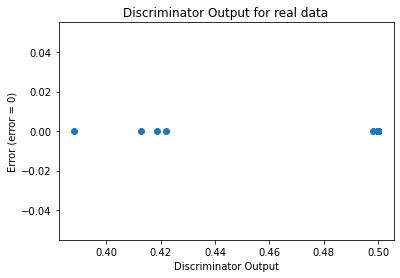

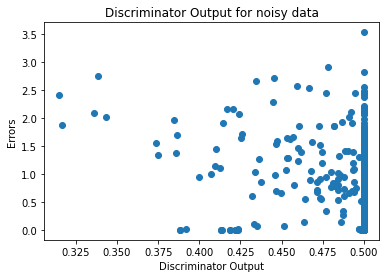

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 63


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09148182187590291


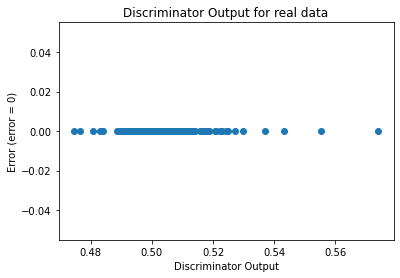

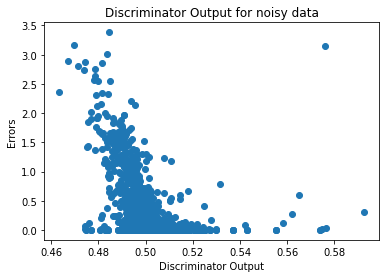

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005128090808880945


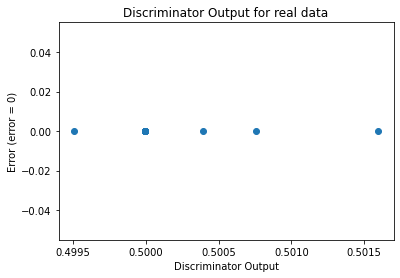

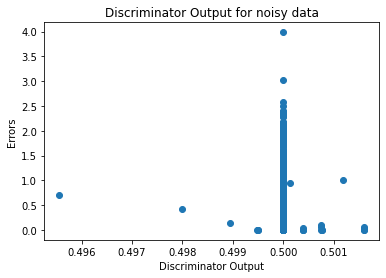

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0030]], requires_grad=True)
